In [46]:
!pip install matplotlib-venn

  Created wheel for matplotlib-venn: filename=matplotlib_venn-0.11.6-py3-none-any.whl size=32061 sha256=8928f9957b457240069c6a1d35edeab07685e22a98b32bbe1953743a7c1348a1
  Stored in directory: /Users/remzicelebi/Library/Caches/pip/wheels/82/e4/64/dd790d424818bc2f59c11471a1eee5dc8cfcd3f8ee8c4812fa
Successfully built matplotlib-venn


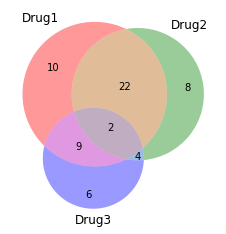

In [47]:
import matplotlib.pyplot as plt
from matplotlib_venn import venn3
 
# Make the diagram
venn3(set_labels= ['Drug1','Drug2', 'Drug3'],subsets = (10, 8, 22, 6,9,4,2))
plt.show()


In [1]:
import pandas as pd

In [7]:
sider_df = pd.read_csv('https://raw.githubusercontent.com/dhimmel/SIDER4/master/data/indications.tsv', sep='\t')

In [8]:
sider_df.to_csv('../data/input/sider_indications.csv')

In [13]:
sider_df.head()

,drugbank_id,drugbank_name,pubchem_id,stitch_id_flat,umls_cui_from_label,method,concept_name,meddra_type,umls_cui_from_meddra,meddra_name
0,DB00014,Goserelin,47725,CID100047725,C0002871,text_mention,Anemia,PT,C0002871,Anaemia
1,DB00014,Goserelin,47725,CID100047725,C0006142,NLP_indication,Malignant neoplasm of breast,PT,C0006142,Breast cancer
2,DB00014,Goserelin,47725,CID100047725,C0006826,NLP_precondition,Malignant Neoplasms,PT,C0006826,Neoplasm malignant
3,DB00014,Goserelin,47725,CID100047725,C0014175,NLP_indication,Endometriosis,PT,C0014175,Endometriosis
4,DB00014,Goserelin,47725,CID100047725,C0025323,text_mention,Menorrhagia,PT,C0025323,Menorrhagia


In [14]:
sider_df.rename(columns={'drugbank_id':'Drug','umls_cui_from_label':'Disease'}, inplace=True)

In [15]:
gold1= sider_df[['Drug','Disease']]

In [16]:
gold1.head()

,Drug,Disease
0,DB00014,C0002871
1,DB00014,C0006142
2,DB00014,C0006826
3,DB00014,C0014175
4,DB00014,C0025323


In [17]:
len(gold1)

16528

In [50]:
gold2= pd.read_csv('../data/input/drugcentral_indications_umls.csv')

In [51]:
gold2.head()

,id,struct_id,concept_id,relationship_name,concept_name,umls_cui,snomed_full_name,cui_semantic_type,snomed_conceptid,id-2,identifier,id_type,struct_id-2,parent_match
0,173432,965,40249340,indication,Malignant tumor of breast,C0006142,Malignant tumor of breast,T191,254837009.0,1343872,DB00858,DRUGBANK_ID,965,True
1,173432,965,40249340,indication,Malignant tumor of breast,C0006142,Malignant tumor of breast,T191,254837009.0,1343651,DB14655,DRUGBANK_ID,965,NaN
2,173433,318,21000716,indication,Gout,C0018099,Gout,T047,90560007.0,1342779,DB12319,DRUGBANK_ID,318,NaN
3,173434,318,21003276,indication,Hyperuricemia,C0740394,Hyperuricemia,T047,35885006.0,1342779,DB12319,DRUGBANK_ID,318,NaN
4,173435,1031,21001432,indication,Hypertensive disorder,C0020538,Hypertensive disorder,T047,38341003.0,1343568,DB13989,DRUGBANK_ID,1031,NaN


In [52]:
gold2.rename(columns={'identifier':'Drug','umls_cui':'Disease'}, inplace=True)

In [53]:
gold2= gold2[['Drug','Disease']]
gold2.head()

,Drug,Disease
0,DB00858,C0006142
1,DB14655,C0006142
2,DB12319,C0018099
3,DB12319,C0740394
4,DB13989,C0020538


In [22]:
gold3= pd.read_csv('../data/input/predict_indications_umls.tsv',sep='\t')

In [26]:
gold3.rename(columns={'drug':'Drug','indication':'Disease'}, inplace=True)

In [27]:
gold3.head()

,Drug,Disease
0,DB00659,C0001973
1,DB00284,C0011860
2,DB00284,C1852093
3,DB00284,C1841962
4,DB00284,C1838100


In [54]:
a = gold2[['Drug','Disease']].values
b = gold3[['Drug','Disease']].values

In [55]:
s1 = pd.merge(gold2, gold3, how='inner', on=['Drug','Disease'])
s1.dropna(inplace=True)

In [56]:
len(s1)

348

In [72]:
#SIDER
a = {tuple((dr,dis)) for dr,dis in gold1[['Drug','Disease']].values }

In [73]:
#DrugCentral
b = {tuple((dr,dis)) for dr,dis in gold2[['Drug','Disease']].values }

In [74]:
#PREDICT
c = {tuple((dr,dis)) for dr,dis in gold3[['Drug','Disease']].values }

In [90]:
a1= len (a.difference(b.union(c))) #SIDER different then others

In [91]:
b1= len (b.difference(a.union(c))) #DrugCentral different then others

In [92]:
c1= len (c.difference(b.union(a))) #PREDICT different then others

In [93]:
len(a),len(b),len(c) #(SIDER, DrugCentral, (PREDICT)

(14685, 9074, 1781)

In [94]:
anbuc =len(b.intersection(a).difference(c)) # (SIDER and DrugCentral) diff (PREDICT)

In [95]:
bncua = len(c.intersection(b).difference(a)) # (PREDICT and DrugCentral) diff (SIDER)

In [96]:
ancub = len(c.intersection(a).difference(b)) # (PREDICT and SIDER) diff (DrugCentral)

In [97]:
anbnc = len(c.intersection(b).intersection(a)) # (PREDICT and NDFRT and DrugCentral)

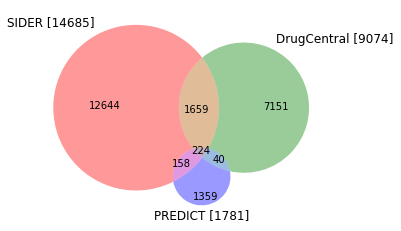

In [98]:
# Make the diagram
#fig = plt.figure(figsize=[400, 500])
venn3(set_labels= ['SIDER [14685]','DrugCentral [9074]', 'PREDICT [1781]'],subsets = (a1, b1, anbuc, c1,ancub, bncua,anbnc))
plt.savefig('../data/figures/coverage.png', dpi=500)
#plt.show()

In [88]:
a= [2128, 5829, 592, 1401,103,124,153]
sum(a)

10330

In [89]:
153/10330

0.014811229428848015

In [108]:
2128+592+153+124

2997

In [107]:
5829+592+153+103

6677

In [92]:
1401+103+153+124

1781

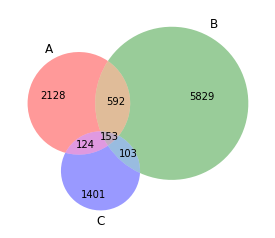

In [3]:
venn3(subsets = (2128, 5829, 592, 1401,124,103,153))
plt.savefig('indications/coverage.png', dpi=500)
#plt.show()